In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.cluster import KMeans 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

import sys

sys.path.append('../src')



from base_exp_gen import generate_experiment as GEN_EXP
from clustering_algos import agglomerative_clustering, kmeans_clustering, box_clustering
from sklearn.model_selection import train_test_split as datasplit
from sklearn.ensemble import GradientBoostingRegressor as GDBR
from evaluations import computeATT_per_cluster as ATTC, predict_cf, calculate_ite, get_homogeneity



In [3]:
N,D = 10**5,2
kw_generate =  {'N':N, 'D':D,'f_gen_name': 'uniform_gen','low':0, 'high': 1}
centers = [[0.25,0.25],[0.5,0.5],[0.75,0.75],[0.75,0.25], [0.25,0.75]]
r_small = [0.122]*5
r_big = [0.2,0.2,0.2, 0.2,0.2]
kw_cluster =  {'f_class_name':'circle_class2', 'centers': centers, 'r_small': r_small, 'r_big':r_big}
kw_treatment = {'f_treat_name' :'uniform_treat','choices':[0,1], 'probabilities':[0.5,0.5]}

stats = np.array([[1, 0.75], [0, 0.75], [1, 0.75], [1, 0.75]])
kw_outcome = {'f_outcome_name': 'outcome1','treatment':'Treatment', 'cls':'C', 'stats':stats}

data = GEN_EXP(kw_generate, kw_cluster, kw_treatment, kw_outcome).dat
data = calculate_ite(data.copy(), treatment = 'Treatment',
                     counterfactual = 'Ycf', outcome = 'Y', ite_name = 'ITE')

In [13]:
mpl.style.available

['_classic_test',
 'fivethirtyeight',
 'classic',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'seaborn',
 'fast',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-talk',
 'ggplot',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-muted',
 'dark_background',
 'seaborn-deep',
 'bmh',
 'tableau-colorblind10',
 'seaborn-pastel',
 'seaborn-bright']

In [19]:
mpl.style.use('seaborn-paper')

In [21]:
d = np.sqrt(data['x0'].values**2+data['x1'].values**2)

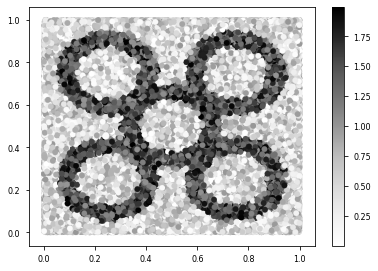

In [26]:
fig, ax = plt.subplots()
sc = ax.scatter(data['x0'].values, data['x1'].values, 
                c = data['C'].values+np.random.rand(len(data)), cmap = 'Greys', norm = )
fig.colorbar(sc, )
plt.show()

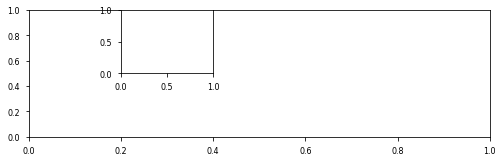

In [33]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 0.4])
ax3 = fig2.add_axes([0.2,0.2,0.2,0.2])

In [39]:
list(ax.get_xminorticklabels())

[]

In [74]:
from collections import defaultdict

graph = defaultdict(set)

#MAKE GRAPH
for a in range(10):
    for b in range(10):
        if (a*b == 0) and ((10*a+b) < 10):
            continue
        graph[a*b].add(10*a + b)
        #graph[a*10+b].add(a*b)

#BFS
to_visit = [0]
visited = set()
while to_visit:
    explore = to_visit.pop(0)
    visited.add(explore)
    for v in graph[explore]:
        if  v not in visited:
            to_visit.append(v)
            
            
print(visited)

{0, 10, 20, 25, 30, 40, 45, 50, 52, 54, 55, 56, 58, 59, 60, 65, 69, 70, 78, 80, 85, 87, 90, 95, 96}


In [68]:
for a in range(10):
    for b in range(10):
        if (a*b == 0) and ((10*a+b) < 10):
            continue
        graph[a*b].add(10*a + b)
        #graph[a*10+b].add(a*b)
        


In [69]:
graph

defaultdict(set,
            {0: {10, 20, 30, 40, 50, 60, 70, 80, 90},
             1: {11},
             2: {12, 21},
             3: {13, 31},
             4: {14, 22, 41},
             5: {15, 51},
             6: {16, 23, 32, 61},
             7: {17, 71},
             8: {18, 24, 42, 81},
             9: {19, 33, 91},
             10: {25, 52},
             12: {26, 34, 43, 62},
             14: {27, 72},
             16: {28, 44, 82},
             18: {29, 36, 63, 92},
             15: {35, 53},
             21: {37, 73},
             24: {38, 46, 64, 83},
             27: {39, 93},
             20: {45, 54},
             28: {47, 74},
             32: {48, 84},
             36: {49, 66, 94},
             25: {55},
             30: {56, 65},
             35: {57, 75},
             40: {58, 85},
             45: {59, 95},
             42: {67, 76},
             48: {68, 86},
             54: {69, 96},
             49: {77},
             56: {78, 87},
             63: {79, 97},
   

In [70]:
to_visit = [0]
visited = set()
while to_visit:
    explore = to_visit.pop(0)
    visited.add(explore)
    for v in graph[explore]:
        if  v not in visited:
            to_visit.append(v)
            
            
print(visited)

{0, 10, 20, 25, 30, 40, 45, 50, 52, 54, 55, 56, 58, 59, 60, 65, 69, 70, 78, 80, 85, 87, 90, 95, 96}


In [71]:
len(visited)

25